# Author : Harshit Srivastava

# Data Science And Business Analytics Internship

# GRIP The Spark Foundation 

# GRIPNOV20

# Task-2 From the given ‘Iris’ dataset, predict the optimum number of clusters   and represent it visually.
 

# Prediction using Unsupervised ML

# Import all libraries 

In [1]:
# Importing the Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
# Reading the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(150)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
# Read successfully
df = pd.read_csv('Iris.csv')
print('Read data successfully :))')

Read data successfully :))


In [4]:
# Display the data
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Data Analysis

In [5]:
# Check for the shape
df.shape

(150, 6)

In [6]:
# Check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [8]:
# Display column names
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
# Display data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [10]:
# Describe details of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


* As we can see there are no null values present. 
* We can use the dataset as it is. 

In [11]:
# Get count of species
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

* There are 3 different species present, each of 50 in number.

# Data Visualisations

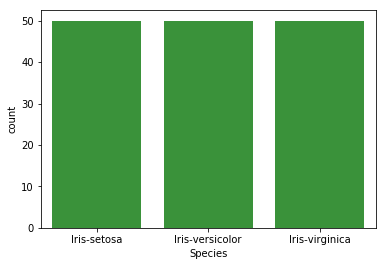

In [12]:
# Ploting data
base = sb.color_palette()[2]
sorted = df['Species'].value_counts().index
sb.countplot(data = df , x = 'Species', order = sorted, color = base);

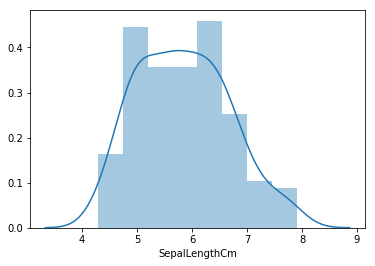

In [13]:
# Ploting sepal lengthcm
sb.distplot(df['SepalLengthCm']);


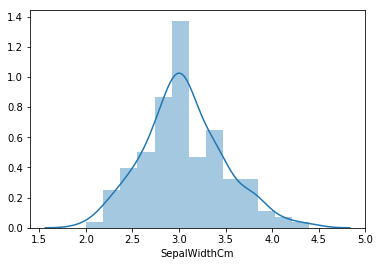

In [14]:
# Ploting sepal widthcm
sb.distplot(df['SepalWidthCm']);

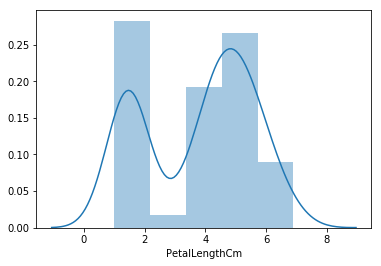

In [15]:
# Ploting petal lengthcm
sb.distplot(df['PetalLengthCm']);


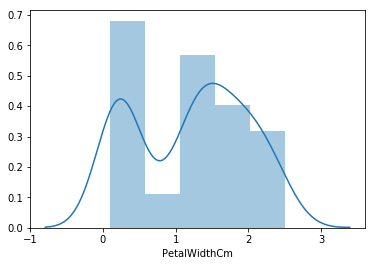

In [16]:
# Ploting petal widthcm
sb.distplot(df['PetalWidthCm']);

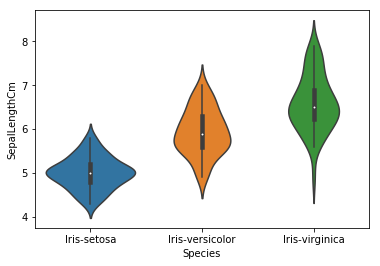

In [17]:
sb.violinplot(data = df, x = 'Species', y = 'SepalLengthCm');


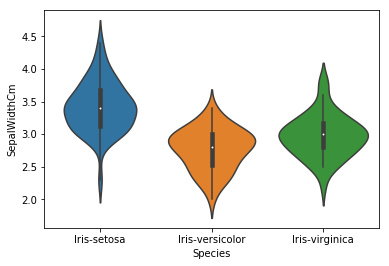

In [18]:
sb.violinplot(data = df, x = 'Species', y = 'SepalWidthCm');

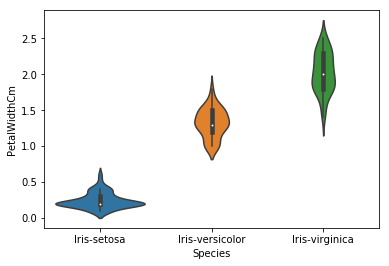

In [19]:
sb.violinplot(data = df, x = 'Species', y = 'PetalWidthCm');

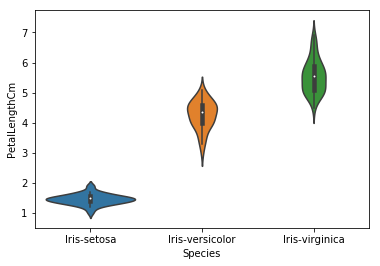

In [20]:
sb.violinplot(data = df, x = 'Species', y = 'PetalLengthCm');

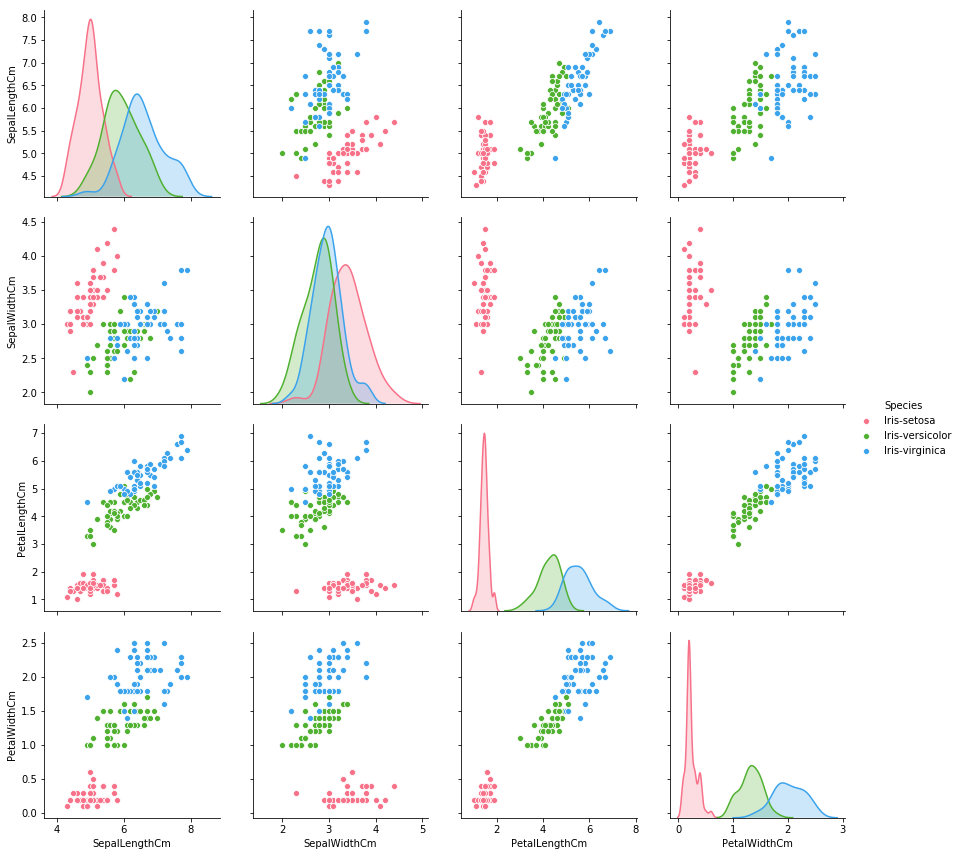

In [21]:
# Plotting the pair plot
sb.pairplot(df.drop('Id',axis = 1),hue = 'Species',palette='husl',height=3, diag_kind= 'kde');


* We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other.



In [22]:
# Drop id column and species column to check correlation between the other features

df_mod = df.drop(columns=['Id','Species'], axis = 1)
df_mod.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


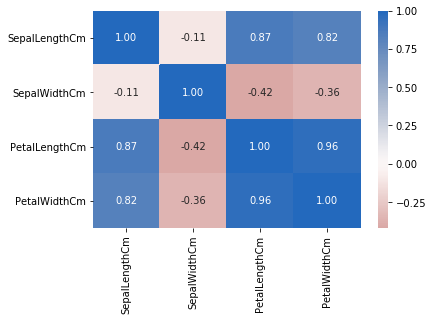

In [23]:
# Heat Map
sb.heatmap(df_mod.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

* Observations made - The heatmap shows the correlation between various features

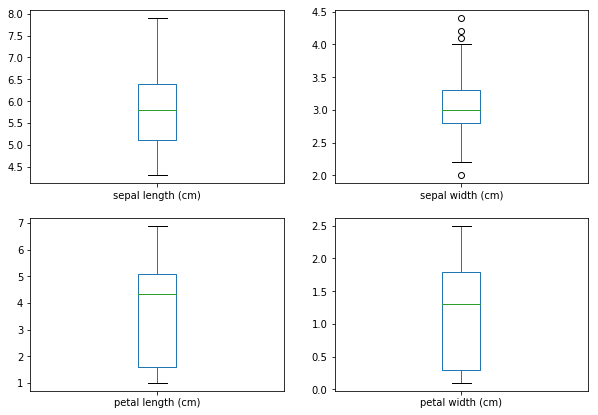

In [24]:
# Univariate Box-Whisker plots
iris_df.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False,figsize =(10,7))
plt.show()

# Finding optimum number of clusters for K means

* How do you find the optimum number of clusters for K Means? How does one determine the value of K?
* There is a popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster.


In [25]:
# Select the required values from the required columns
x = df.drop(columns= ['PetalWidthCm', 'Species'], axis = 1).values

In [26]:
# Define list
within_css = [] # within cluster sum of square

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    within_css.append(kmeans.inertia_)


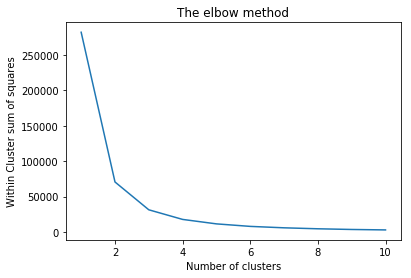

In [27]:
# Plot the graph to observe elbow
plt.plot(range(1, 11), within_css)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster sum of squares') 
plt.show()

* It can be clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

* From this we choose the number of clusters as 3.

# Creating K-Mean Classifier

In [28]:
# Applying K-Means
kmeans = KMeans(n_clusters= 3, n_init=10, max_iter=300, random_state=123) 

In [29]:
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [30]:
# Centroid value
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [31]:
kpred=kmeans.predict(iris_df)
kpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [32]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

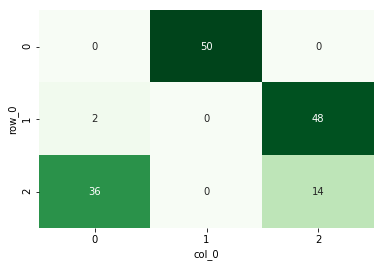

In [33]:
# Comparing
cross_tab = pd.crosstab(iris.target, kpred)
sb.heatmap(cross_tab,annot=True,cbar=False,cmap="Greens")

In [34]:
# Labelling cluster in datset
labels = kmeans.labels_
label_clust = iris_df.assign(cluster=labels)
label_clust

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


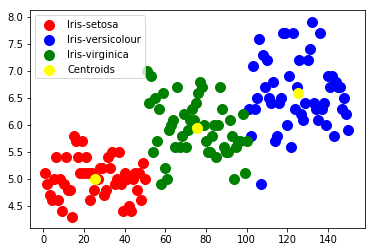

In [36]:
#  Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();

# Thank You !!